
## **Forecasting COVID-19 Cases  Using Fbprophet** 

by 

Bhaskar Illa

Research Scholar

CSIR-NGRI, India.

# ***Data***

We collected reliabe daily update COVID19 timeseries data provided by Johns Hopkins University Center for System Science and Engineering and avialable on github repository (https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). In our research, we selected daily confirmed cases of top 15 COVID19 affected regions on the globe.


# ***Fbprophet***

In this study, we utilized python based time series forecasting Library ‘Fbprophet’ to bring about accurate prediction outcomes with faster computation. This tool deleloped by Facebook’s code data science team and available in both python and R , which they make it as a open source in 2017 (https://facebook.github.io/prophet/docs/installation.html) .While prophet provides very intuitive parametes and which are easy to handle, fast, accurate, fully automatic and tunable forecast parameters. Furthermore, complete theory and statistical/mathematical approch behind this tool briefly explained in Taylor and Letham,2017 (Taylor S. J. and Letham B., 2018.Forecasting at scale, Am. Stat., 72,37–45, https://doi.org/10.1080/00031305.2017.1380080).

The method uses a capably depomposible time-series model be made up of three main components, those are trend, seasonality and holidays. In its core, it is regreassion model with human-interpretable parameters that often generates good predicted outcomes with their default values.

In Prophet, always allowing two columns in the input data as ds (datestamp) and y (historical data). Then, we adjusted our model more reliable by assigning the appropriate values to tuning parameters, which are like changepoint_prior_scale and changepoint_range for making trend flexible, kept yearly seasonality false due to our datasets consists less than one year, 95 percentage of confidence inverval applied by interval_width parameter, seasonality_mode and seasonality_prior_scale paramters for controlling seasonal flexibility. Ultimately, we are estimating the forecast results (yhat) along with 95 percentage confidence value range (yhat_lower,yhat_upper). The predition perfomance of the models is estimated by computing of root mean sqaure error (RMSE) and mean absolute error (MAE).

Tutorial link - https://facebook.github.io/prophet/

# ***Note***

The daily confirmed cases are siginficantly increasing on last couple of weeks in Turkey (https://www.worldometers.info/coronavirus/country/turkey/). So,Larger range of forecasting COVID19 infected cases in this region might be suspicious but still included here.


In [ ]:
from pylab import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import datetime
import operator
import os

import fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_yearly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation,performance_metrics

In [ ]:
# Confirmed cases 

world_cf=pd.read_csv("time_series_covid19_confirmed_global.csv")
data_cf=world_cf.iloc[:,4:]  #use only location, and timeseries data
country_cf=world_cf["Country/Region"]
world_cfy=pd.concat([country_cf,data_cf],axis=1)
uk_conf=world_cfy[world_cfy['Country/Region'] == 'United Kingdom'].sum(axis=0)[1:] #repeated values make it sum
fr_conf=world_cfy[world_cfy['Country/Region'] == 'France'].sum(axis=0)[1:]
world_cfyy=world_cfy[world_cfy['Country/Region'] != 'United Kingdom']  # repeated values remove
world_cfz=world_cfyy[world_cfyy['Country/Region'] != 'France']
country_tmp=world_cfz['Country/Region']
dfuk=pd.concat([world_cfz.T,uk_conf],axis=1)
world_cfzz= dfuk.reindex(uk_conf.index)
dffr=pd.concat([world_cfzz,fr_conf],axis=1)
world_cfaa= dffr.reindex(fr_conf.index)
country_tmpn=pd.Series(['United Kingdom','France'])
country_fin=pd.concat([country_tmp,country_tmpn],axis=0)
country=pd.Series(country_fin.values,name='Country')
world_cfbb=world_cfaa.T.set_index(pd.Index(np.arange(len(country_fin))))
world_cc=pd.concat([country,world_cfbb],axis=1)
world_cc=world_cc.iloc[:,:-1]

conf_cum=pd.Series(world_cc.iloc[:,-1].values,name='Confirmed')
conf_loc=world_cc['Country']
conf_tmp=pd.concat([conf_loc,conf_cum],axis=1)
top_conf=conf_tmp.sort_values(by='Confirmed',ascending=False).head(15)
tail_conf=conf_tmp.sort_values(by='Confirmed',ascending=False).tail(len(conf_cum)-15)
rworld_conf=sum(tail_conf["Confirmed"])
sel_country=np.array(top_conf['Country'])
blw_country=np.array(tail_conf['Country'])
date_cc=pd.to_datetime(world_cc.columns[1:])

251


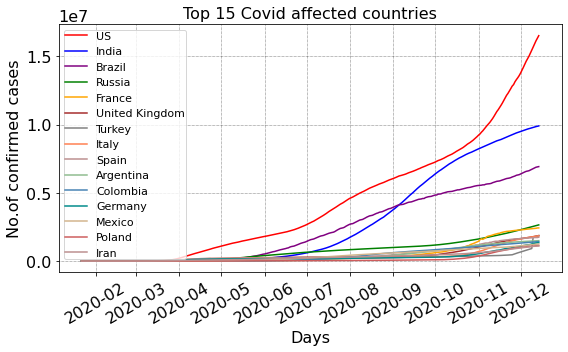

In [129]:
print("\n----- Cummulative plot ------\n")

matplotlib.rcParams['figure.figsize'] = (8,5)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
tsave=[]
color=['red','blue','purple','green','orange','brown','gray','coral','rosybrown','darkseagreen','steelblue',\
      'darkcyan','tan','indianred','rosybrown']
for i in sel_country:
    tsave.append(i)
    a=int(len(tsave))-1
    plt.plot(date_cc,world_cc[world_cc['Country'] == str(i)].values.ravel()[1:],alpha=1.0,label=i,c=color[a])
    plt.legend(loc='upper left',borderpad=0.1,prop={'size': 11,'weight':'light'})
    #yscale('log')
    ylabel("No.of confirmed cases",size=16)
    xlabel("Days",size=16)
    plt.title("Top 15 Covid affected countries",size=16)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.grid(color="black",linestyle="dotted",linewidth=0.5)
    plt.savefig("top15_confirmed.jpg",dpi=500,bbox_inches='tight')

INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsi

  Country  Confirmed
0  Others   19250270
            Country Confirmed
236              US  16518420
134           India   9906165
30           Brazil   6927145
200          Russia   2656601
250          France   2435751
249  United Kingdom   1874867
235          Turkey   1866345
140           Italy   1855737
220           Spain   1751884
6         Argentina   1503222
91         Colombia   1434516
121         Germany   1357261
169          Mexico   1255974
196          Poland   1140572
136            Iran   1115770
0            Others  19250270


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning:

Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



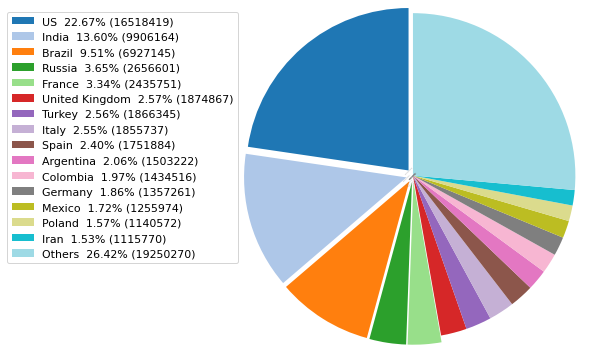

In [ ]:

print("\n----- Pie Chart ------\n")

world_topa=top_conf.sort_values(by='Confirmed', ascending=False)
rworld_conf=sum(tail_conf["Confirmed"])
lst = ['Others',rworld_conf]
df = pd.DataFrame([lst])
df.columns =['Country','Confirmed']
print(df)
world_topxx=pd.concat([world_topa,df], axis=0)
print(world_topxx)
matplotlib.rcParams['figure.figsize'] = (8,5)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

def make_autopct(values):
    def my_autopct(pct):
        total=sum(values)
        val=int(round(pct*total/100.))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

Explodes=np.zeros(len(world_topxx))
Explodes[0]=0.05
Explodes[1]=0.05
Explodes[2]=0.05
Explodes[3]=0.05
Explodes[4]=0.05

cmap = plt.cm.tab20  #tab10,tab20,pastel1,pastel2,Dark2,set1,set2,set3,GnBu,Blues,gray,Accent,Paired,Set1,2,3
colors = cmap(np.linspace(0., 1., len(world_topxx)))
w,l,p=plt.pie(world_topxx["Confirmed"],startangle=90,radius=1.2,\
        pctdistance=0.,labeldistance=1.1,counterclock=True,frame=False,explode=Explodes,\
        autopct=make_autopct(world_topxx['Confirmed']),shadow=False,colors=colors,textprops = {'color':'gray','fontsize':0})#autopct='%2.2f%%'
[t.set_rotation(45) for t in p]

lbstr=[]
for i in p:
    lbstr.append(str(i).strip(')(').split(',')[2].strip("' '")) #strip('][').split(', ')

lbstr=np.array(lbstr)    
flabel=np.array(world_topxx["Country"])+"  "+lbstr
plt.legend(labels=flabel,loc='left center', bbox_to_anchor=(0.0, 1.),fontsize=11)
plt.axis(aspect=1.5)
plt.tight_layout()
plt.savefig("world_confirmed_pie.jpg",dpi=500)
plt.show()

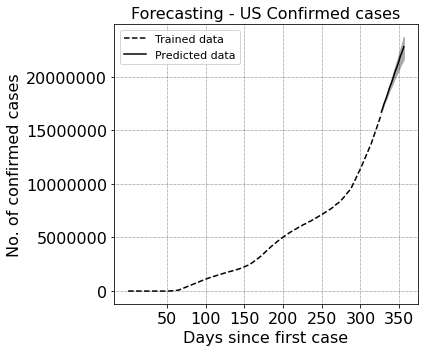

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.671294e+07  1.668497e+07  1.674147e+07
329 2020-12-16  1.692905e+07  1.689921e+07  1.695748e+07
330 2020-12-17  1.714900e+07  1.711463e+07  1.718474e+07
331 2020-12-18  1.738570e+07  1.734105e+07  1.744165e+07
332 2020-12-19  1.759830e+07  1.753238e+07  1.766612e+07
333 2020-12-20  1.777875e+07  1.768508e+07  1.787172e+07
334 2020-12-21  1.796974e+07  1.784033e+07  1.807770e+07
335 2020-12-22  1.818108e+07  1.804129e+07  1.832317e+07
336 2020-12-23  1.839774e+07  1.822417e+07  1.855787e+07
337 2020-12-24  1.861856e+07  1.840566e+07  1.880879e+07
338 2020-12-25  1.885753e+07  1.860741e+07  1.907098e+07
339 2020-12-26  1.907032e+07  1.880153e+07  1.930124e+07
340 2020-12-27  1.924830e+07  1.893617e+07  1.950720e+07
341 2020-12-28  1.943774e+07  1.909249e+07  1.973121e+07
342 2020-12-29  1.964922e+07  1.925650e+07  1.997117e+07
343 2020-12-30  1.986643e+07  1.942942e+07  2.024104e+07
344 2020-12-31  2.008812e+07  1

In [ ]:
print("\n----- Forecasting COVID19 cases ------\n")

train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[0]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=1)

model.fit(train_df) 
pdays=30    # Forecasting limit
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[0])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[0])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[0])+'_forecast.dat'
filexx=str(sel_country[0])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')


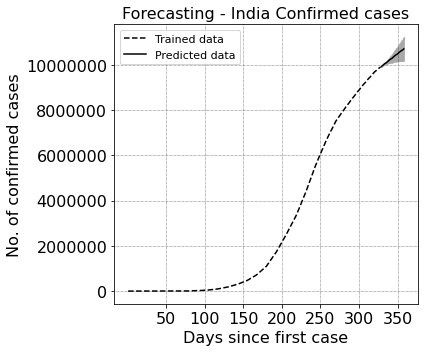

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  9.925458e+06  9.914495e+06  9.935777e+06
329 2020-12-16  9.958084e+06  9.945132e+06  9.970505e+06
330 2020-12-17  9.988370e+06  9.970802e+06  1.000299e+07
331 2020-12-18  1.001811e+07  9.993198e+06  1.003990e+07
332 2020-12-19  1.004682e+07  1.001328e+07  1.008400e+07
333 2020-12-20  1.007171e+07  1.002506e+07  1.011636e+07
334 2020-12-21  1.008680e+07  1.002973e+07  1.014209e+07
335 2020-12-22  1.011269e+07  1.004169e+07  1.018521e+07
336 2020-12-23  1.014543e+07  1.006027e+07  1.022749e+07
337 2020-12-24  1.017578e+07  1.007332e+07  1.026880e+07
338 2020-12-25  1.020558e+07  1.008143e+07  1.031039e+07
339 2020-12-26  1.023432e+07  1.009201e+07  1.035495e+07
340 2020-12-27  1.025917e+07  1.009971e+07  1.040003e+07
341 2020-12-28  1.027405e+07  1.009119e+07  1.043308e+07
342 2020-12-29  1.029993e+07  1.009923e+07  1.047704e+07
343 2020-12-30  1.033277e+07  1.011632e+07  1.053043e+07
344 2020-12-31  1.036319e+07  1

In [ ]:

train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[1]].values.ravel()[1:],dtype=float)


model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))+1
xxa=np.arange(len(pred_ts.index))+1+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[1])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[1])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[1])+'_forecast.dat'
filexx=str(sel_country[1])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')


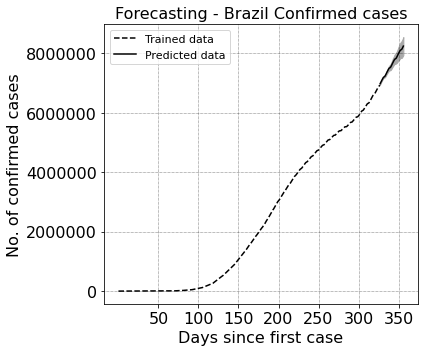

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  6.975828e+06  6.957132e+06  6.995307e+06
329 2020-12-16  7.031190e+06  7.012022e+06  7.050393e+06
330 2020-12-17  7.085387e+06  7.066406e+06  7.106180e+06
331 2020-12-18  7.136276e+06  7.115729e+06  7.160045e+06
332 2020-12-19  7.186200e+06  7.162311e+06  7.212896e+06
333 2020-12-20  7.206776e+06  7.180614e+06  7.240922e+06
334 2020-12-21  7.228584e+06  7.191634e+06  7.268314e+06
335 2020-12-22  7.277773e+06  7.234512e+06  7.323388e+06
336 2020-12-23  7.333660e+06  7.288679e+06  7.392675e+06
337 2020-12-24  7.388328e+06  7.334213e+06  7.450379e+06
338 2020-12-25  7.439540e+06  7.372629e+06  7.515630e+06
339 2020-12-26  7.489743e+06  7.419709e+06  7.566800e+06
340 2020-12-27  7.509362e+06  7.422692e+06  7.604048e+06
341 2020-12-28  7.530277e+06  7.432248e+06  7.632849e+06
342 2020-12-29  7.579718e+06  7.469214e+06  7.695320e+06
343 2020-12-30  7.636131e+06  7.519157e+06  7.762415e+06
344 2020-12-31  7.691268e+06  7

In [ ]:
#Confirmed cases
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[2]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=1)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[2])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[2])+"_confirmed.jpg",dpi=500)
show()
filex=str(sel_country[2])+'_forecast.dat'
filexx=str(sel_country[2])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

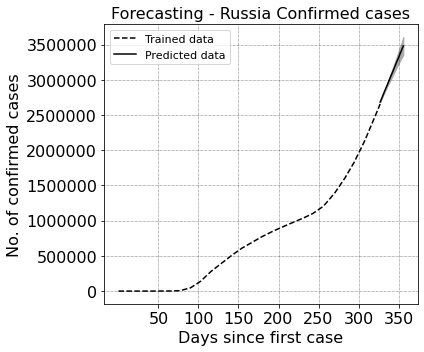

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  2.684659e+06  2.681732e+06  2.687479e+06
329 2020-12-16  2.710745e+06  2.707743e+06  2.713781e+06
330 2020-12-17  2.738029e+06  2.734092e+06  2.741523e+06
331 2020-12-18  2.766230e+06  2.760461e+06  2.771683e+06
332 2020-12-19  2.794365e+06  2.785381e+06  2.802692e+06
333 2020-12-20  2.822422e+06  2.810055e+06  2.833487e+06
334 2020-12-21  2.850170e+06  2.835799e+06  2.864909e+06
335 2020-12-22  2.877350e+06  2.858568e+06  2.894410e+06
336 2020-12-23  2.903334e+06  2.882532e+06  2.924501e+06
337 2020-12-24  2.930601e+06  2.906630e+06  2.956878e+06
338 2020-12-25  2.958850e+06  2.929422e+06  2.988135e+06
339 2020-12-26  2.987029e+06  2.951198e+06  3.020419e+06
340 2020-12-27  3.015121e+06  2.974686e+06  3.051925e+06
341 2020-12-28  3.042884e+06  2.997477e+06  3.082832e+06
342 2020-12-29  3.070041e+06  3.020541e+06  3.115069e+06
343 2020-12-30  3.095922e+06  3.042536e+06  3.143876e+06
344 2020-12-31  3.123173e+06  3

In [ ]:

#Confirmed cases
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[3]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)
tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[3])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[3])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[3])+'_forecast.dat'
filexx=str(sel_country[3])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

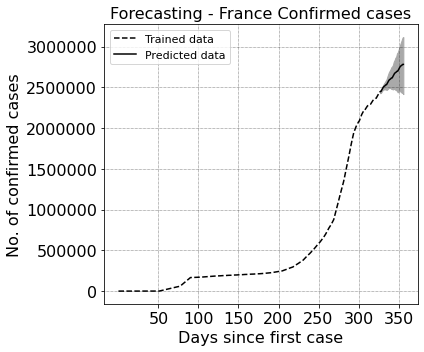

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  2.447889e+06  2.429111e+06  2.467009e+06
329 2020-12-16  2.449992e+06  2.432291e+06  2.467970e+06
330 2020-12-17  2.468496e+06  2.448951e+06  2.488258e+06
331 2020-12-18  2.486485e+06  2.464235e+06  2.509582e+06
332 2020-12-19  2.504147e+06  2.476031e+06  2.533013e+06
333 2020-12-20  2.513599e+06  2.474376e+06  2.551434e+06
334 2020-12-21  2.520472e+06  2.475857e+06  2.566020e+06
335 2020-12-22  2.531440e+06  2.476318e+06  2.584364e+06
336 2020-12-23  2.533210e+06  2.468260e+06  2.599782e+06
337 2020-12-24  2.551936e+06  2.476442e+06  2.632786e+06
338 2020-12-25  2.570130e+06  2.486593e+06  2.661703e+06
339 2020-12-26  2.587983e+06  2.492234e+06  2.689606e+06
340 2020-12-27  2.597351e+06  2.493876e+06  2.705672e+06
341 2020-12-28  2.604055e+06  2.489088e+06  2.724599e+06
342 2020-12-29  2.614991e+06  2.481577e+06  2.748085e+06
343 2020-12-30  2.616427e+06  2.479357e+06  2.758043e+06
344 2020-12-31  2.635377e+06  2

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[4]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[4])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[4])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[4])+'_forecast.dat'
filexx=str(sel_country[4])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

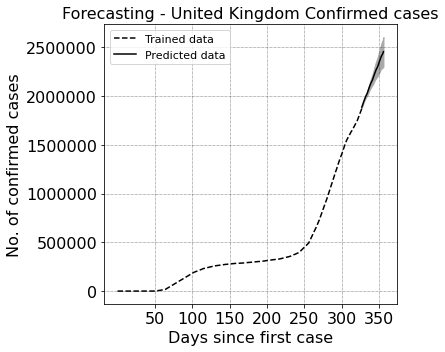

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.887871e+06  1.882269e+06  1.893546e+06
329 2020-12-16  1.908698e+06  1.902607e+06  1.914968e+06
330 2020-12-17  1.931673e+06  1.924271e+06  1.937725e+06
331 2020-12-18  1.952830e+06  1.944498e+06  1.960291e+06
332 2020-12-19  1.974011e+06  1.962324e+06  1.984504e+06
333 2020-12-20  1.993194e+06  1.977769e+06  2.005847e+06
334 2020-12-21  2.010370e+06  1.991459e+06  2.026088e+06
335 2020-12-22  2.024856e+06  2.002679e+06  2.044538e+06
336 2020-12-23  2.045773e+06  2.017507e+06  2.071269e+06
337 2020-12-24  2.068990e+06  2.037582e+06  2.097715e+06
338 2020-12-25  2.090254e+06  2.053844e+06  2.121606e+06
339 2020-12-26  2.111544e+06  2.070981e+06  2.149551e+06
340 2020-12-27  2.130694e+06  2.085099e+06  2.173096e+06
341 2020-12-28  2.147702e+06  2.098997e+06  2.196190e+06
342 2020-12-29  2.161841e+06  2.108486e+06  2.216372e+06
343 2020-12-30  2.182849e+06  2.123191e+06  2.242384e+06
344 2020-12-31  2.206306e+06  2

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[5]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[5])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[5])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[5])+'_forecast.dat'
filexx=str(sel_country[5])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

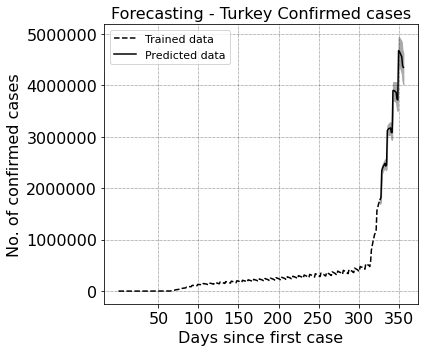

rmse error ----> 181274 mae error -----> 171166


In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[6]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=1.0)

model.fit(train_df) 
pdays=30    
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[6])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[6])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[6])+'_forecast.dat'
filexx=str(sel_country[6])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

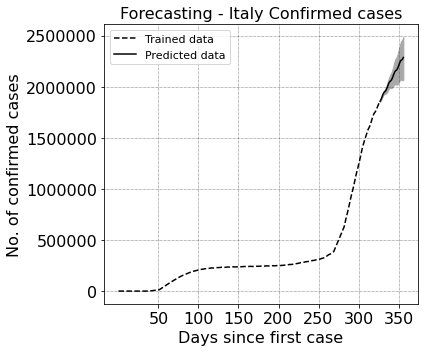

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.858861e+06  1.852637e+06  1.865056e+06
329 2020-12-16  1.874047e+06  1.867898e+06  1.880791e+06
330 2020-12-17  1.893367e+06  1.885493e+06  1.901727e+06
331 2020-12-18  1.914733e+06  1.902435e+06  1.924900e+06
332 2020-12-19  1.933438e+06  1.917684e+06  1.946662e+06
333 2020-12-20  1.946861e+06  1.927946e+06  1.965275e+06
334 2020-12-21  1.952876e+06  1.928240e+06  1.975132e+06
335 2020-12-22  1.962054e+06  1.930502e+06  1.990799e+06
336 2020-12-23  1.977264e+06  1.939196e+06  2.011232e+06
337 2020-12-24  1.996834e+06  1.950809e+06  2.037458e+06
338 2020-12-25  2.018557e+06  1.969440e+06  2.062782e+06
339 2020-12-26  2.037471e+06  1.980936e+06  2.088199e+06
340 2020-12-27  2.050817e+06  1.987098e+06  2.107458e+06
341 2020-12-28  2.056364e+06  1.986717e+06  2.124994e+06
342 2020-12-29  2.065247e+06  1.986851e+06  2.136845e+06
343 2020-12-30  2.080481e+06  1.991909e+06  2.162649e+06
344 2020-12-31  2.100302e+06  2

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[7]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[7])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[7])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[7])+'_forecast.dat'
filexx=str(sel_country[7])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

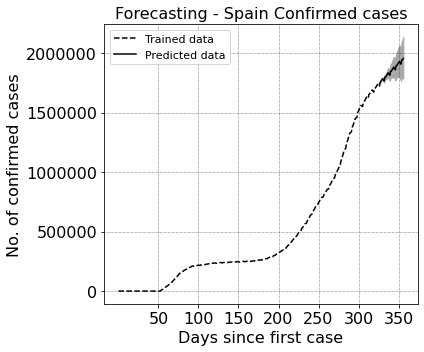

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.753878e+06  1.747240e+06  1.761670e+06
329 2020-12-16  1.764649e+06  1.757536e+06  1.772428e+06
330 2020-12-17  1.774877e+06  1.766727e+06  1.782742e+06
331 2020-12-18  1.786101e+06  1.776813e+06  1.796219e+06
332 2020-12-19  1.775921e+06  1.763269e+06  1.788039e+06
333 2020-12-20  1.765650e+06  1.749434e+06  1.782513e+06
334 2020-12-21  1.799790e+06  1.780998e+06  1.819112e+06
335 2020-12-22  1.801505e+06  1.777775e+06  1.825009e+06
336 2020-12-23  1.812383e+06  1.784901e+06  1.839232e+06
337 2020-12-24  1.822704e+06  1.789508e+06  1.857145e+06
338 2020-12-25  1.834045e+06  1.795578e+06  1.874678e+06
339 2020-12-26  1.823410e+06  1.781681e+06  1.871172e+06
340 2020-12-27  1.812685e+06  1.764590e+06  1.866374e+06
341 2020-12-28  1.847552e+06  1.793447e+06  1.905519e+06
342 2020-12-29  1.849132e+06  1.791053e+06  1.914249e+06
343 2020-12-30  1.860117e+06  1.793723e+06  1.933438e+06
344 2020-12-31  1.870530e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[8]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=1)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[8])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[8])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[8])+'_forecast.dat'
filexx=str(sel_country[8])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

#obs=train_df[['y']].tail(20).values.ravel()
#pred=forecast[['yhat']].tail(50).head(20).astype(int).values.ravel()

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

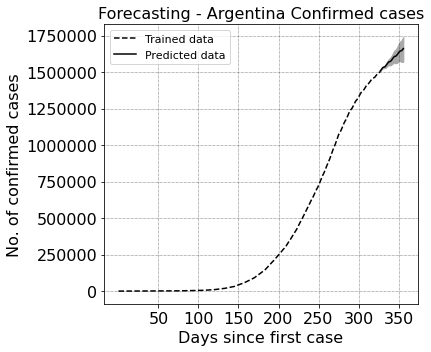

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.506363e+06  1.503500e+06  1.509251e+06
329 2020-12-16  1.513539e+06  1.510624e+06  1.516378e+06
330 2020-12-17  1.521264e+06  1.517698e+06  1.524664e+06
331 2020-12-18  1.528880e+06  1.524333e+06  1.532815e+06
332 2020-12-19  1.533196e+06  1.527180e+06  1.538415e+06
333 2020-12-20  1.534180e+06  1.526580e+06  1.541313e+06
334 2020-12-21  1.537255e+06  1.527488e+06  1.545734e+06
335 2020-12-22  1.543248e+06  1.530235e+06  1.554446e+06
336 2020-12-23  1.550471e+06  1.534868e+06  1.564580e+06
337 2020-12-24  1.558255e+06  1.541389e+06  1.574465e+06
338 2020-12-25  1.565928e+06  1.545848e+06  1.584033e+06
339 2020-12-26  1.570220e+06  1.546290e+06  1.591246e+06
340 2020-12-27  1.571101e+06  1.545412e+06  1.595443e+06
341 2020-12-28  1.574123e+06  1.546689e+06  1.601668e+06
342 2020-12-29  1.580133e+06  1.550627e+06  1.609798e+06
343 2020-12-30  1.587402e+06  1.554181e+06  1.618689e+06
344 2020-12-31  1.595246e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[9]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=1)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[9])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[9])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[9])+'_forecast.dat'
filexx=str(sel_country[9])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

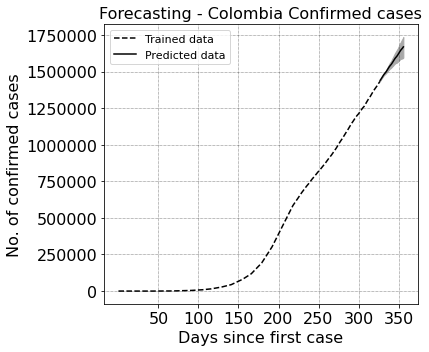

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.439717e+06  1.437070e+06  1.442418e+06
329 2020-12-16  1.447680e+06  1.444935e+06  1.450445e+06
330 2020-12-17  1.456367e+06  1.453369e+06  1.459596e+06
331 2020-12-18  1.465158e+06  1.461568e+06  1.469230e+06
332 2020-12-19  1.473904e+06  1.469268e+06  1.479124e+06
333 2020-12-20  1.481750e+06  1.476431e+06  1.488637e+06
334 2020-12-21  1.488198e+06  1.480499e+06  1.496263e+06
335 2020-12-22  1.494860e+06  1.486158e+06  1.504953e+06
336 2020-12-23  1.502826e+06  1.491936e+06  1.515009e+06
337 2020-12-24  1.511544e+06  1.499497e+06  1.526419e+06
338 2020-12-25  1.520369e+06  1.506378e+06  1.537072e+06
339 2020-12-26  1.529147e+06  1.512244e+06  1.547703e+06
340 2020-12-27  1.536992e+06  1.518624e+06  1.558413e+06
341 2020-12-28  1.543386e+06  1.522174e+06  1.566916e+06
342 2020-12-29  1.550003e+06  1.527093e+06  1.574212e+06
343 2020-12-30  1.557972e+06  1.533609e+06  1.586887e+06
344 2020-12-31  1.566720e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[10]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[10])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[10])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[10])+'_forecast.dat'
filexx=str(sel_country[10])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

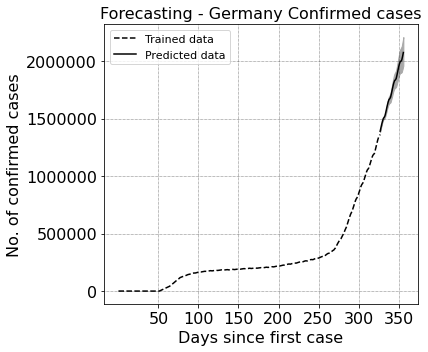

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.388911e+06  1.384280e+06  1.393154e+06
329 2020-12-16  1.420259e+06  1.415469e+06  1.425095e+06
330 2020-12-17  1.451101e+06  1.445520e+06  1.456633e+06
331 2020-12-18  1.478764e+06  1.472310e+06  1.485265e+06
332 2020-12-19  1.499894e+06  1.491497e+06  1.508073e+06
333 2020-12-20  1.509640e+06  1.497980e+06  1.520597e+06
334 2020-12-21  1.523039e+06  1.508522e+06  1.534403e+06
335 2020-12-22  1.551368e+06  1.533578e+06  1.566363e+06
336 2020-12-23  1.583652e+06  1.559673e+06  1.600671e+06
337 2020-12-24  1.615344e+06  1.589541e+06  1.635740e+06
338 2020-12-25  1.643475e+06  1.612538e+06  1.669441e+06
339 2020-12-26  1.664341e+06  1.628462e+06  1.693077e+06
340 2020-12-27  1.672604e+06  1.634606e+06  1.703800e+06
341 2020-12-28  1.684952e+06  1.641022e+06  1.722471e+06
342 2020-12-29  1.713826e+06  1.667638e+06  1.757564e+06
343 2020-12-30  1.747046e+06  1.693676e+06  1.796765e+06
344 2020-12-31  1.779587e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[11]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[11])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[11])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[11])+'_forecast.dat'
filexx=str(sel_country[11])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))
obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

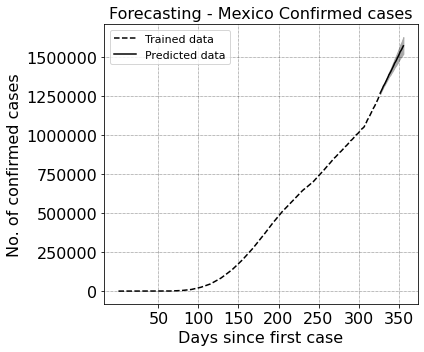

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.268739e+06  1.264120e+06  1.273406e+06
329 2020-12-16  1.279360e+06  1.274753e+06  1.284010e+06
330 2020-12-17  1.290271e+06  1.285759e+06  1.295116e+06
331 2020-12-18  1.300855e+06  1.296319e+06  1.305707e+06
332 2020-12-19  1.313605e+06  1.308364e+06  1.319090e+06
333 2020-12-20  1.322066e+06  1.316502e+06  1.328204e+06
334 2020-12-21  1.331210e+06  1.325023e+06  1.338655e+06
335 2020-12-22  1.341970e+06  1.335041e+06  1.350500e+06
336 2020-12-23  1.352600e+06  1.344087e+06  1.363023e+06
337 2020-12-24  1.363536e+06  1.353898e+06  1.375265e+06
338 2020-12-25  1.374127e+06  1.362629e+06  1.387304e+06
339 2020-12-26  1.387004e+06  1.374343e+06  1.401872e+06
340 2020-12-27  1.395353e+06  1.380722e+06  1.414034e+06
341 2020-12-28  1.404424e+06  1.387289e+06  1.422739e+06
342 2020-12-29  1.415201e+06  1.397238e+06  1.434778e+06
343 2020-12-30  1.425840e+06  1.405093e+06  1.450150e+06
344 2020-12-31  1.436801e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[12]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[12])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[12])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[12])+'_forecast.dat'
filexx=str(sel_country[12])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))
obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

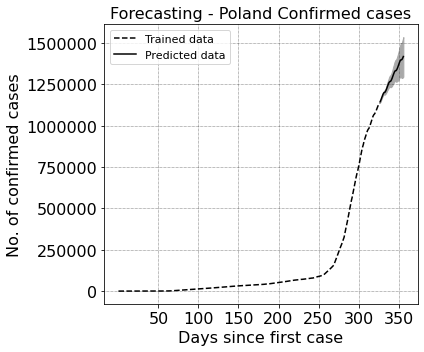

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.145304e+06  1.140838e+06  1.149787e+06
329 2020-12-16  1.156470e+06  1.151599e+06  1.161592e+06
330 2020-12-17  1.169888e+06  1.164869e+06  1.175425e+06
331 2020-12-18  1.182925e+06  1.176794e+06  1.189557e+06
332 2020-12-19  1.194721e+06  1.185405e+06  1.203079e+06
333 2020-12-20  1.201017e+06  1.191016e+06  1.213026e+06
334 2020-12-21  1.202406e+06  1.188038e+06  1.216189e+06
335 2020-12-22  1.210740e+06  1.194671e+06  1.227756e+06
336 2020-12-23  1.222010e+06  1.203057e+06  1.244068e+06
337 2020-12-24  1.235655e+06  1.214142e+06  1.261788e+06
338 2020-12-25  1.248896e+06  1.222239e+06  1.275665e+06
339 2020-12-26  1.260822e+06  1.232406e+06  1.291235e+06
340 2020-12-27  1.266946e+06  1.235807e+06  1.302473e+06
341 2020-12-28  1.267898e+06  1.232188e+06  1.306052e+06
342 2020-12-29  1.276177e+06  1.235229e+06  1.316653e+06
343 2020-12-30  1.287549e+06  1.241564e+06  1.331409e+06
344 2020-12-31  1.301423e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[13]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df) 
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[13])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[13])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[13])+'_forecast.dat'
filexx=str(sel_country[13])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))

obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')

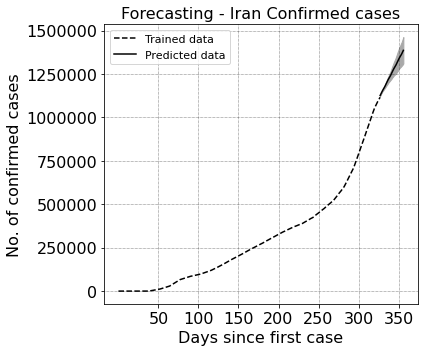

            ds          yhat    yhat_lower    yhat_upper
328 2020-12-15  1.126258e+06  1.124494e+06  1.127803e+06
329 2020-12-16  1.135919e+06  1.133944e+06  1.137821e+06
330 2020-12-17  1.145352e+06  1.142809e+06  1.147359e+06
331 2020-12-18  1.154606e+06  1.150565e+06  1.158134e+06
332 2020-12-19  1.162836e+06  1.156586e+06  1.167889e+06
333 2020-12-20  1.170797e+06  1.163174e+06  1.177532e+06
334 2020-12-21  1.178992e+06  1.169166e+06  1.188078e+06
335 2020-12-22  1.188825e+06  1.176815e+06  1.199019e+06
336 2020-12-23  1.198526e+06  1.184246e+06  1.210675e+06
337 2020-12-24  1.207986e+06  1.190479e+06  1.223633e+06
338 2020-12-25  1.217256e+06  1.198401e+06  1.234320e+06
339 2020-12-26  1.225448e+06  1.204082e+06  1.244141e+06
340 2020-12-27  1.233356e+06  1.209703e+06  1.254774e+06
341 2020-12-28  1.241512e+06  1.215584e+06  1.265919e+06
342 2020-12-29  1.251392e+06  1.220859e+06  1.278549e+06
343 2020-12-30  1.261133e+06  1.228982e+06  1.292643e+06
344 2020-12-31  1.270619e+06  1

In [ ]:
train_df=pd.DataFrame()
train_df['ds']=date_cc
train_df['y']=np.array(world_cc[world_cc['Country'] == sel_country[14]].values.ravel()[1:],dtype=float)

model=Prophet(interval_width=0.95,daily_seasonality=True,mcmc_samples=0,\
              seasonality_mode = 'multiplicative',changepoint_prior_scale=0.5,yearly_seasonality=False,\
              seasonality_prior_scale=10,weekly_seasonality=True,changepoint_range=0.98)

model.fit(train_df)
pdays=30
future=model.make_future_dataframe(periods=pdays,include_history=True)
forecast=model.predict(future)

tot_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].head(len(train_df)))
pred_ts=pd.DataFrame(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(pdays))

pred_ts.set_index('ds',inplace=True)
tot_ts.set_index('ds',inplace=True)

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

fig, ax = plt.subplots(1,figsize=(6,5))
ax.ticklabel_format(style='plain')
xa=np.arange(len(tot_ts.index))
xxa=np.arange(len(pred_ts.index))+max(xa)
ax.plot(xa,tot_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="--",label="Trained data",color='k')
ax.plot(xxa,pred_ts["yhat"],linewidth=1.5,alpha=1.0,linestyle="-",label="Predicted data",color='k')
ax.fill_between(xxa, pred_ts['yhat_upper'], pred_ts['yhat_lower'], alpha=1.0, color='darkgray')
plt.xlabel("Days since first case",size=16)
plt.xticks([50,100,150,200,250,300,350])
plt.legend(loc=2,fontsize=11)
plt.ylabel("No. of confirmed cases",size=16)
plt.title('Forecasting - '+str(sel_country[14])+' Confirmed cases',size=16)
plt.tight_layout()
plt.grid(color="black",linestyle="dotted",linewidth=0.5)
plt.savefig("fbpt_"+str(sel_country[14])+"_confirmed.jpg",dpi=500)
show()

filex=str(sel_country[14])+'_forecast.dat'
filexx=str(sel_country[14])+'_forecast_err.dat'

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30).to_csv(filex)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30))
obs=train_df[['y']].tail(10).values.ravel()
pred=forecast[['yhat']].tail(40).head(10).astype(int).values.ravel()
rmse=np.sqrt(((pred - obs) ** 2).mean())
mae=np.absolute(pred-obs).mean()
print('rmse error ---->', int(rmse),'mae error ----->', int(mae))
error=[]
error.append(int(rmse))
error.append(int(mae))
np.savetxt(filexx,np.array(error),fmt='%i')